# Group 27 DSCI 100: Project Proposal

### 1. Introduction:

### 2. Tidy Data:
Our data was The Global Health Observatory (GHO) data repository under World Health Organization (WHO): https://www.who.int/data/gho

We combine GDP and Population Data taken from the World Bank: https://databank.worldbank.org/home.aspx


In [3]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source("tests_worksheet_09.R")
source('cleanup_worksheet_09.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [4]:
# import data from data folder

life_expectancy <- read_csv("data/life_expectancy.csv")

Parsed with column specification:
cols(
  country = col_character(),
  year = col_double(),
  life_expectancy = col_double(),
  adult_mortality = col_double(),
  infant_deaths = col_double(),
  alcohol = col_double(),
  hepatitis_b = col_double(),
  measles = col_double(),
  bmi = col_double(),
  under_five_deaths = col_double(),
  polio = col_double(),
  health_expenditure = col_double(),
  diphtheria = col_double(),
  HIV_AIDS = col_double(),
  gdp = col_double(),
  population = col_double()
)



### 3. Graphs:

1. Generate new variables and calculate:
    - GDP per capita (GDP / Population)
    - country classification (based on GDP per capita): Low-income (<4,000), Medium-income 
(4,000-13,000), High-income (13,000+)
    - Health expenditure per capita (Health expenditure / population)
    - Health expenditure as a % of GDP (health expenditure / GDP)
    
2. Create a table

3. Generate Graphs:
    - GDP per capita on X axis, Health expenditure per capita on Y axis (color with country classification)
    - Health expenditure per capita on x-axis, mortality outcomes on y axis (to life_expectancy, infant_deaths, under_five_deaths
    - Health expenditure per capita on x-axis, health outcomes on y axis (to polio, measles, hiv_aids)

In [14]:
life_expectancy

country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under_five_deaths,polio,health_expenditure,diphtheria,HIV_AIDS,gdp,population
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,65.0,263,62,0.01,65,1154,19.1,83,6,8.16,65,0.1,584.2592,33736494
Afghanistan,2014,59.9,271,64,0.01,62,492,18.6,86,58,8.18,62,0.1,612.6965,327582
Afghanistan,2013,59.9,268,66,0.01,64,430,18.1,89,62,8.13,64,0.1,631.7450,31731688
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zimbabwe,2002,44.8,73,25,4.43,73,304,26.3,40,73,6.53,71,39.8,57.34834,125525
Zimbabwe,2001,45.3,686,25,1.72,76,529,25.9,39,76,6.16,75,42.1,548.58731,12366165
Zimbabwe,2000,46.0,665,24,1.68,79,1483,25.5,39,78,7.10,78,43.5,547.35888,12222251


In [22]:
life_expectancy_mutated <- life_expectancy %>% 
group_by(country) %>% ## May need to delete if you want to track over time
summarise_all("mean", na.rm = TRUE) %>%
mutate(health_expenditure_per_capita = ((health_expenditure/100)*(gdp * population)) / population) %>%
mutate(gdp_classification = as.factor(ifelse(gdp < 4000, "Low-Income",
                                      ifelse(gdp < 13000,"Medium-Income", 
                                                         "High-Income"))))

## May want to rename some of the colums to make them easier to understand like health expenditure -> health expenditure % of gdp
life_expectancy_mutated

country,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under_five_deaths,polio,health_expenditure,diphtheria,HIV_AIDS,gdp,population,health_expenditure_per_capita,gdp_classification
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.0143750,64.5625,2362.250,15.51875,107.5625,48.375,8.252500,52.3125,0.1,340.0154,9972259.8,28.05977,Low-Income
Albania,2007.5,75.15625,45.0625,0.6875,4.8487500,98.0000,53.375,49.06875,0.9375,98.125,5.945625,98.0625,0.1,2119.7267,696911.6,126.03100,Low-Income
Algeria,2007.5,73.61875,108.1875,20.3125,0.4066667,78.0000,1943.875,48.74375,23.5000,91.750,4.604000,91.8750,0.1,2847.8534,21649827.4,131.11517,Low-Income
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yemen,2007.5,63.86250,211.8125,39.3750,0.04733333,55.68750,2761.188,33.4875,51.6250,67.125,5.005333,72.6250,0.10000,NaN,NaN,NaN,NA
Zambia,2007.5,53.90625,354.3125,33.4375,2.23933333,69.81818,6563.812,17.4500,52.3750,64.375,5.824000,74.2500,11.93125,811.8118,6260246,47.27992,Low-Income
Zimbabwe,2007.5,50.48750,462.3750,26.5625,4.48200000,70.56250,923.000,25.1375,40.8125,75.625,6.158667,75.1875,23.26250,410.9802,8021343,25.31090,Low-Income


Warning message:
“Removed 48 rows containing missing values (geom_point).”
Warning message:
“Removed 50 rows containing missing values (geom_point).”


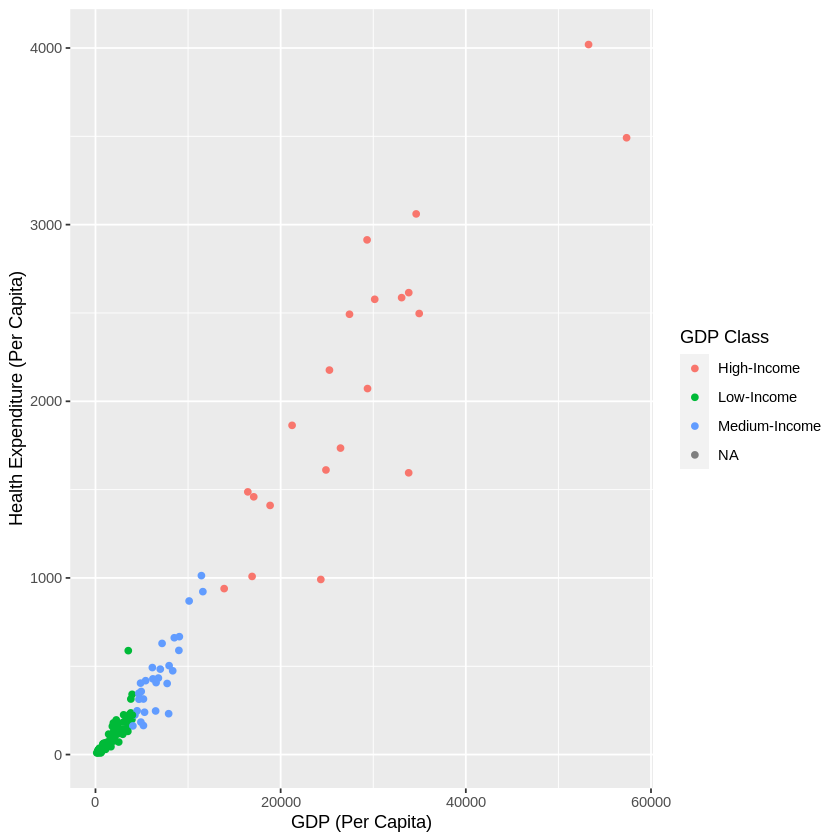

Warning message:
“Removed 50 rows containing missing values (geom_point).”


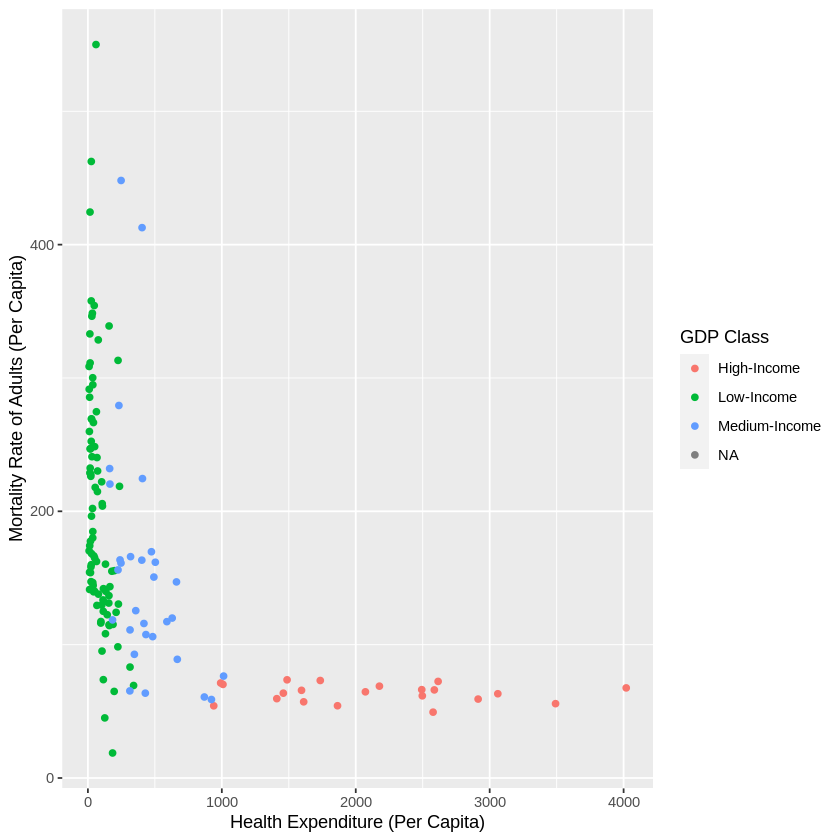

Warning message:
“Removed 48 rows containing missing values (geom_point).”


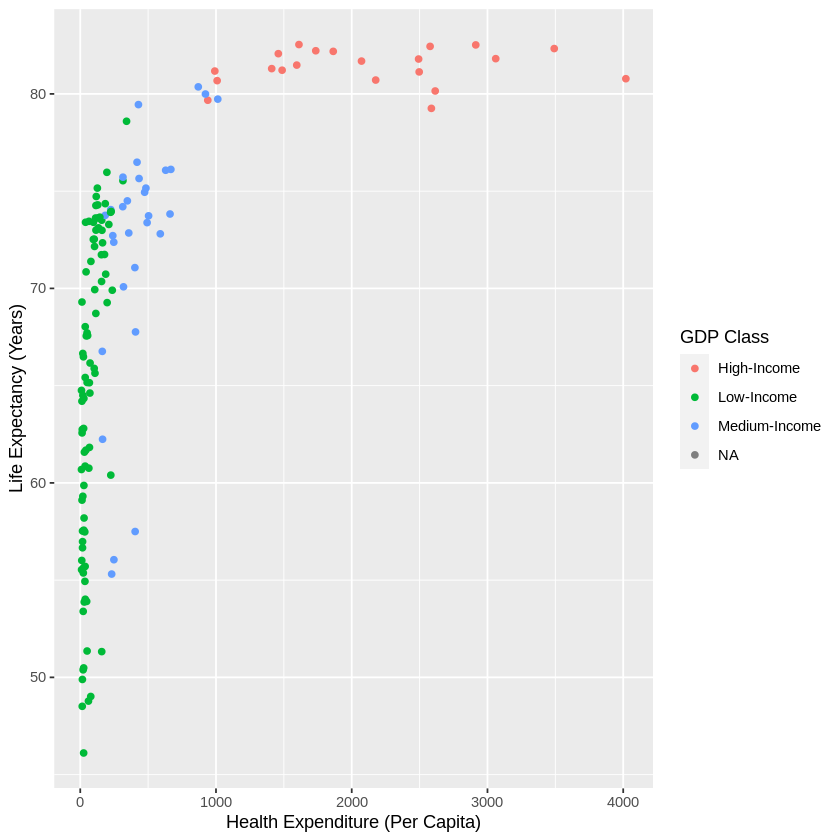

Warning message:
“Removed 48 rows containing missing values (geom_point).”


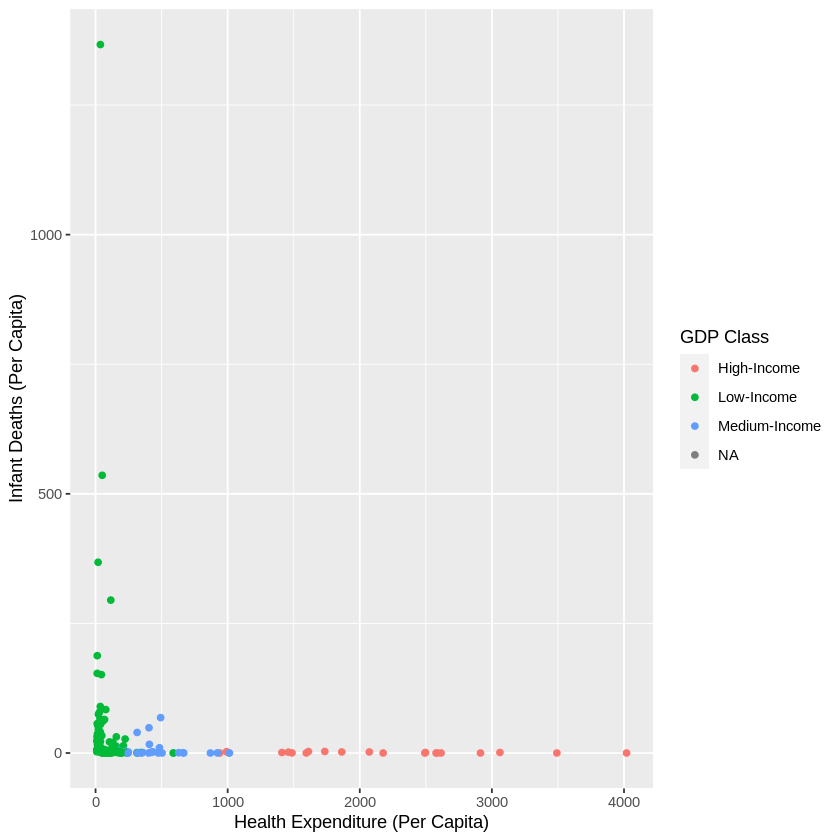

Warning message:
“Removed 48 rows containing missing values (geom_point).”


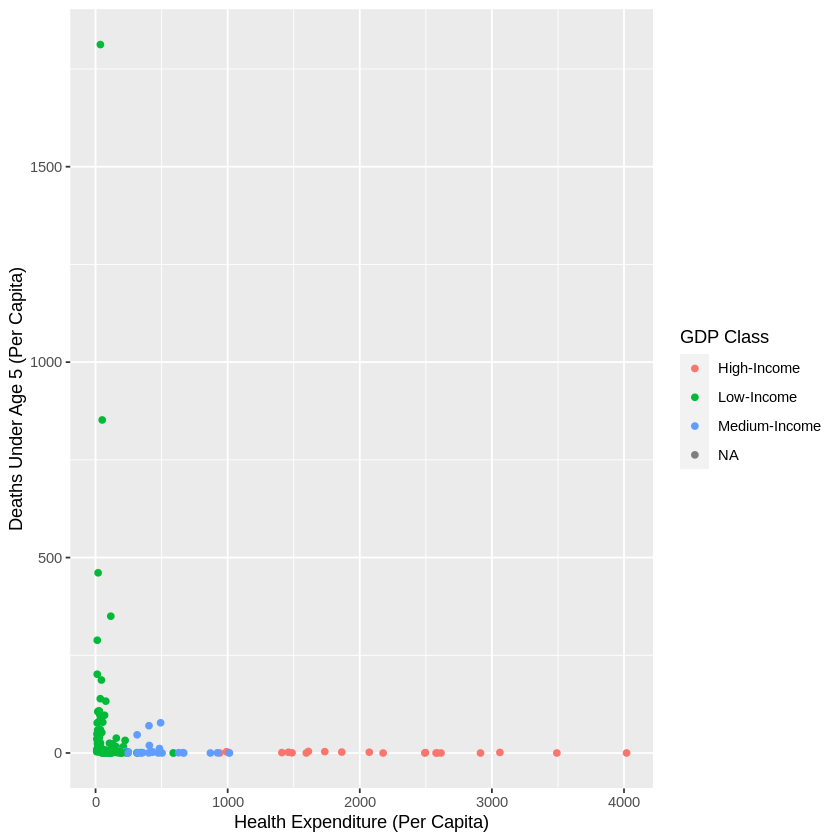

Warning message:
“Removed 48 rows containing missing values (geom_point).”


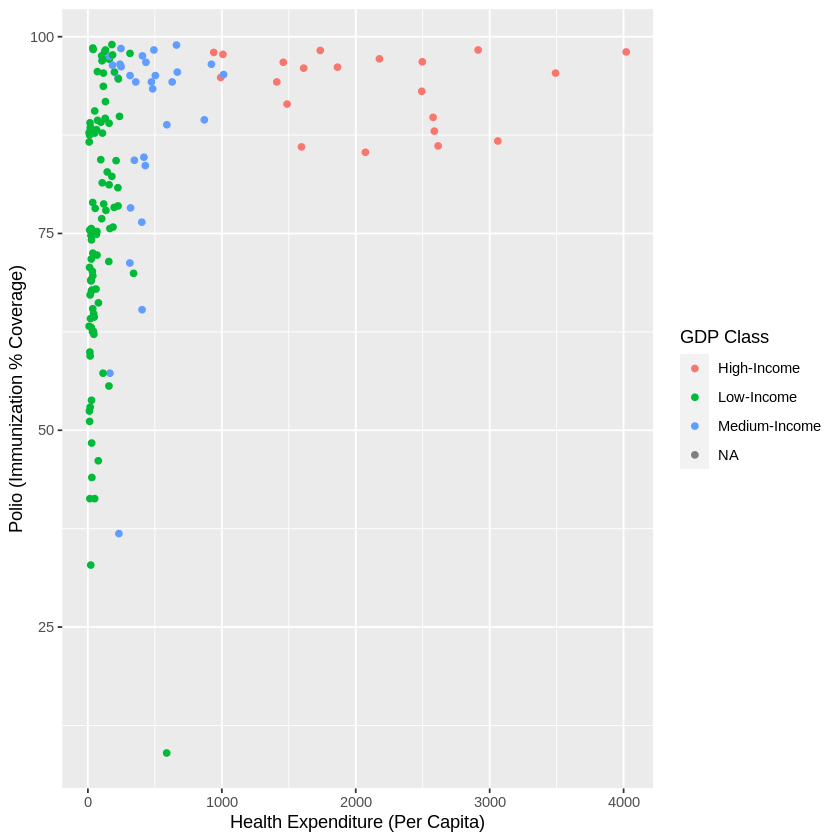

Warning message:
“Removed 48 rows containing missing values (geom_point).”


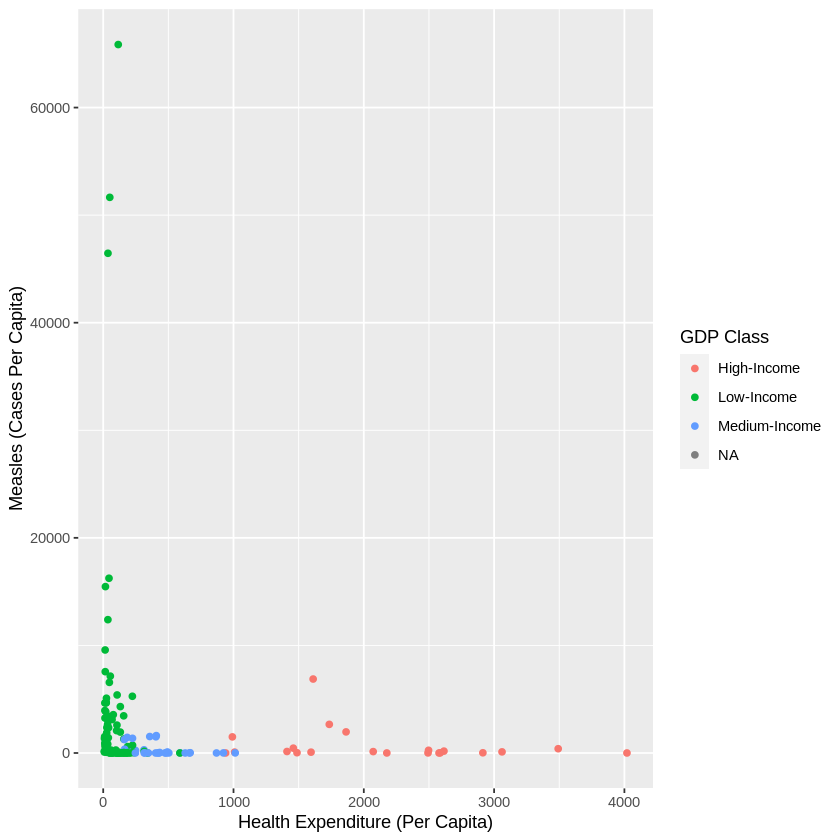

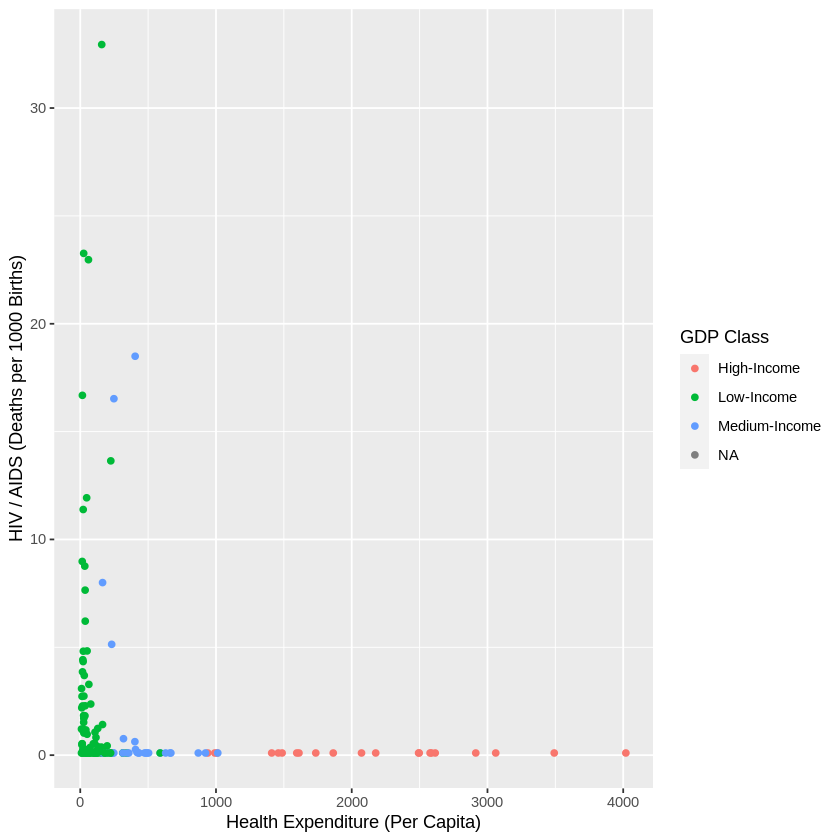

In [28]:
Proposal_Plot_1<-life_expectancy_mutated %>%
ggplot(aes(x = gdp, y = health_expenditure_per_capita, color = gdp_classification))+
geom_point()+
labs(x= "GDP (Per Capita)", y= "Health Expenditure (Per Capita)", color = "GDP Class") 

Proposal_Plot_1.2<-life_expectancy_mutated %>%
ggplot(aes(x = health_expenditure_per_capita, y= adult_mortality, color = gdp_classification))+
geom_point()+
labs(x= "Health Expenditure (Per Capita)", y = "Mortality Rate of Adults (Per Capita)", color = "GDP Class") 

Proposal_Plot_2.1<-life_expectancy_mutated %>%
ggplot(aes(x = health_expenditure_per_capita, y = life_expectancy, color = gdp_classification))+
geom_point()+
labs(y= "Life Expectancy (Years)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_2.2<-life_expectancy_mutated %>%
ggplot(aes(x = health_expenditure_per_capita, y = infant_deaths, color = gdp_classification))+
geom_point()+
labs(y= "Infant Deaths (Per Capita)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_2.3<-life_expectancy_mutated %>%
ggplot(aes(x = health_expenditure_per_capita, y = under_five_deaths, color = gdp_classification))+
geom_point()+
labs(y= "Deaths Under Age 5 (Per Capita)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_3.1<-life_expectancy_mutated %>%
ggplot(aes(x = health_expenditure_per_capita, y = polio, color = gdp_classification))+
geom_point()+
labs(y= "Polio (Immunization % Coverage)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_3.2<-life_expectancy_mutated %>%
ggplot(aes(x = health_expenditure_per_capita, y = measles, color = gdp_classification))+
geom_point()+
labs(y= "Measles (Cases Per Capita)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_3.3<-life_expectancy_mutated %>%
ggplot(aes(x = health_expenditure_per_capita, y = HIV_AIDS, color = gdp_classification))+
geom_point()+
labs(y= "HIV / AIDS (Deaths per 1000 Births)", x= "Health Expenditure (Per Capita)", color = "GDP Class")

Proposal_Plot_1
Proposal_Plot_1.2
Proposal_Plot_2.1
Proposal_Plot_2.2
Proposal_Plot_2.3
Proposal_Plot_3.1
Proposal_Plot_3.2
Proposal_Plot_3.3